## PCA and Clustering on 'Home-credit-default-risk'

#### This program uses the dataset "application_train.csv"available at "https://www.kaggle.com/c/home-credit-default-risk/data"¶

#### Data Preparation and Exploration

In [37]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn import decomposition
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#Customizing figure features

plt.style.use('seaborn-paper')
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
plt.rcParams.update(plt.rcParamsDefault) 

In [3]:
# Setting the dataset filepath

os.chdir("/Users/ratulnandy/Documents/GitHub/assignment_1-1-ratul-nandy/Module_3")
df_train_wh = pd.read_csv('application_train.csv')

In [4]:
# Encoding non-numeric data - One hot encoding

dummy = pd.get_dummies(df_train_wh.NAME_CONTRACT_TYPE, prefix ='NAME_CONTRACT_TYPE' ) 
dummy = dummy.drop(['NAME_CONTRACT_TYPE_Revolving loans'], axis = 'columns') # 0 will denote Revolving loans
df_merged = pd.concat([df_train_wh,dummy],axis='columns') 

# [0,0] will denote data not available
dummy = pd.get_dummies(df_train_wh.CODE_GENDER, prefix='CODE_GENDER')
dummy = dummy.drop(['CODE_GENDER_XNA'], axis = 'columns') 
df_merged = pd.concat([df_merged,dummy],axis='columns') 

# 0 will denote FLAG_OWN_CAR_N = 1
dummy = pd.get_dummies(df_train_wh.FLAG_OWN_CAR, prefix ='FLAG_OWN_CAR', drop_first = True ) 
df_merged = pd.concat([df_merged,dummy],axis='columns')

# 0 will denote FLAG_OWN_REALTY_N = 1
dummy = pd.get_dummies(df_train_wh.FLAG_OWN_REALTY, prefix='FLAG_OWN_REALTY', drop_first = True)
df_merged = pd.concat([df_merged,dummy],axis='columns')

dummy = pd.get_dummies(df_train_wh.NAME_TYPE_SUITE, prefix='NAME_TYPE_SUITE')
df_merged = pd.concat([df_merged,dummy],axis='columns')

dummy = pd.get_dummies(df_train_wh.NAME_INCOME_TYPE, prefix='NAME_INCOME_TYPE')
df_merged = pd.concat([df_merged,dummy],axis='columns')

dummy = pd.get_dummies(df_train_wh.NAME_EDUCATION_TYPE, prefix='NAME_EDUCATION_TYPE')
df_merged = pd.concat([df_merged,dummy],axis='columns')

dummy = pd.get_dummies(df_train_wh.NAME_FAMILY_STATUS, prefix='NAME_FAMILwY_STATUS')
df_merged = pd.concat([df_merged,dummy],axis='columns')

dummy = pd.get_dummies(df_train_wh.FONDKAPREMONT_MODE, prefix='FONDKAPREMONT_MODE')
df_merged = pd.concat([df_merged,dummy],axis='columns')

dummy = pd.get_dummies(df_train_wh.HOUSETYPE_MODE, prefix='HOUSETYPE_MODE')
df_merged = pd.concat([df_merged,dummy],axis='columns')

dummy = pd.get_dummies(df_train_wh.WALLSMATERIAL_MODE, prefix='WALLSMATERIAL_MODE')
# Dropping the Others column
dummy = dummy.drop(['WALLSMATERIAL_MODE_Others'], axis = 'columns')
df_merged = pd.concat([df_merged,dummy],axis='columns')

#EMERGENCYSTATE_MODE_No = 0
dummy = pd.get_dummies(df_train_wh.EMERGENCYSTATE_MODE, prefix='EMERGENCYSTATE_MODE', drop_first = True)
df_merged = pd.concat([df_merged,dummy],axis='columns')


In [5]:
# Creating a clean dataset with only numeric data

df_clean = df_merged.drop(['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'], axis = 'columns')


In [6]:
# Replacing the missing data
df_final = df_clean.interpolate()

# Replacing car own age = 0 for Nan Values
df_final[['OWN_CAR_AGE']] = df_final[['OWN_CAR_AGE']].replace(np.nan, 0)


### Creating a PCA and determining the top 10 principal components. Visualizing the PCA

#### Creating the Principal Component Analysis with top 10 Principal Components

In [7]:
# Scaling the dataset

scaler = StandardScaler()
scaler.fit(df_final)
scaled_data = scaler.transform(df_final)

In [8]:
# Performing the PCA
pca = PCA(n_components=10, random_state = 453)
pca.fit(scaled_data)

PCA(n_components=10, random_state=453)

In [9]:
t_pca = pca.transform(scaled_data)

In [10]:
# Compute and retreive PCA score values 

d_pca = pd.DataFrame(t_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
d_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-4.996557,0.806217,1.356092,-0.259268,0.081834,0.876949,-1.934823,0.812521,1.878312,4.365364
1,-1.030077,1.356710,-4.044602,2.552309,-0.366600,-0.476504,1.018723,1.413434,1.469338,-0.448276
2,-1.204532,0.470267,-2.172747,-2.731231,-0.427961,1.505697,-2.630824,-0.098179,-1.176594,-0.459536
3,-1.176420,-0.133185,-2.109969,-1.808737,-0.441664,0.756990,-0.695418,0.536332,0.813352,0.140559
4,-1.064703,1.088927,-1.976272,-1.674127,-0.249537,1.175962,-1.266667,-0.608224,-2.892642,-0.118422
...,...,...,...,...,...,...,...,...,...,...
307506,2.841934,1.298773,-3.174851,1.545008,1.629408,0.265652,-4.395968,-0.759690,0.304166,0.272416
307507,-4.669179,-5.077128,0.843217,0.545734,0.074858,0.668243,-1.885330,0.590799,0.077290,-0.457540
307508,6.273535,0.141695,2.941198,1.015962,-2.222240,0.191878,-1.309152,-0.555208,2.627170,0.772444
307509,-3.742773,0.861881,0.400593,-1.003030,-0.060610,0.389369,-0.510883,1.025075,-0.380484,-1.006586


In [11]:
# Explained variance for each PC

ex_pca = pca.explained_variance_ratio_

In [12]:
# Creating a dataframe of Explained Variance

d_c_pca = pd.DataFrame(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], columns =['PC'])
d_ex_pca = pd.DataFrame(ex_pca, columns = ['Explained Variance'])
df_ex_pca = pd.concat([d_c_pca,d_ex_pca], axis =1)
df_ex_pca

,PC,Explained Variance
0,PC1,0.112688
1,PC2,0.037438
2,PC3,0.031818
3,PC4,0.025042
4,PC5,0.021350
5,PC6,0.020016
6,PC7,0.019604
7,PC8,0.018268
8,PC9,0.017800
9,PC10,0.016960


#### Plotting the top 10 Principal Components

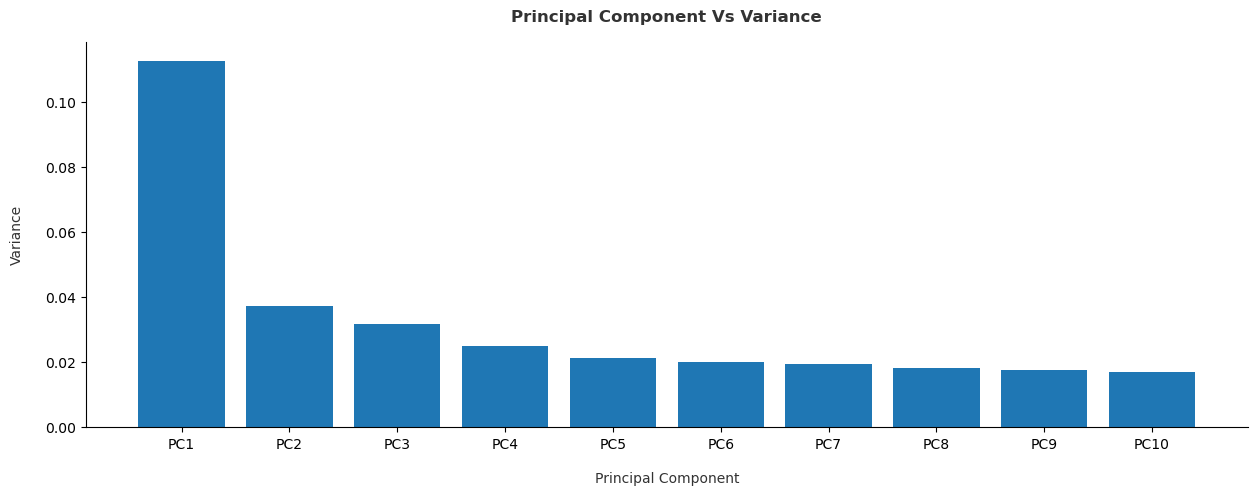

In [13]:
# Creating the plot and visualizing the Principal components

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], ex_pca)
ax.set_title("Principal Component Vs Variance", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Principal Component",labelpad=15, color='#333333')
ax.set_ylabel("Variance",labelpad=15, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Identifying the 'elbow of the curve'

#### We can see in the below diagram that PC1, PC2, PC3, PC4 and PC5  contributes to the significance variance

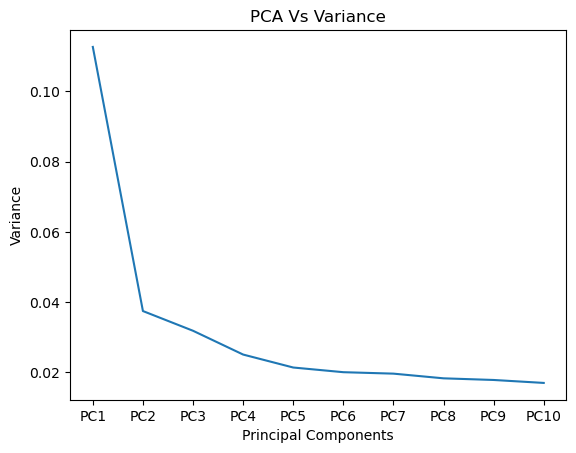

In [14]:
plt.plot(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], ex_pca)
plt.title('PCA Vs Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.show()

### Visualizing the PCA with PC1, PC2, PC3, PC4 and PC5

In [15]:
temp_target = df_train_wh[['TARGET']]
pc_v = pd.concat([d_pca,temp_target], axis =1)


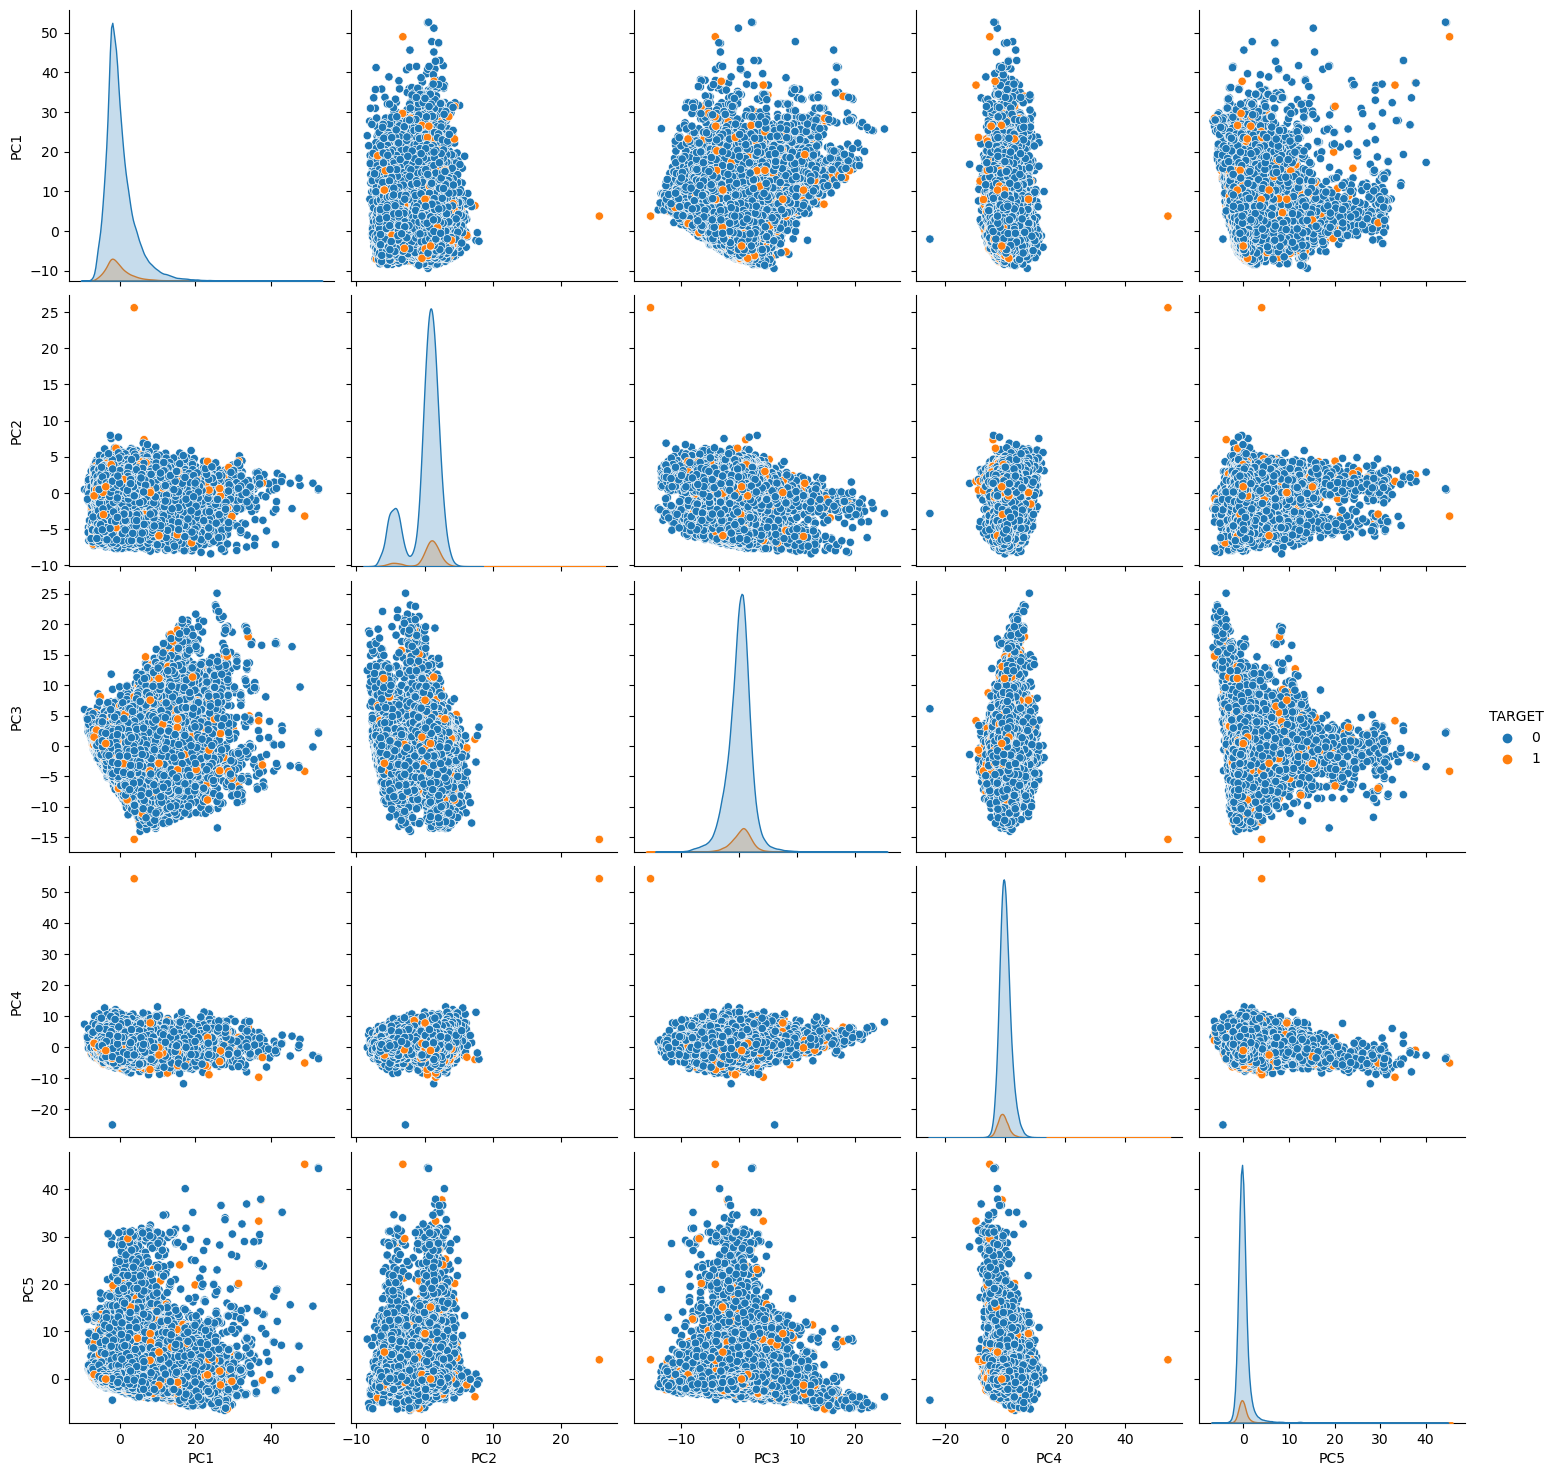

In [31]:
df_feature = pc_v[['PC1','PC2','PC3','PC4','PC5','TARGET']]
df_feature
sns.pairplot(df_feature, hue='TARGET', height=3)
plt.show()




#### After performing the principal component analysis , it is observed that most of the variance in the data occurs in the first five princial componets. 

### Using the hierarchical clustering and visualizing the tree to determine the best “cut”

## Using the Principal Components to perform Hierarchical Clustering ( HCPC) 

#### ***** While generating the Dendrogram, the kernel was getting disconnected because of memory issue. As a result, only the first three PCs was considered and some of the rows were also dropped to reduce complexity

In [16]:
# Normalizing the dataset
h_dpca = d_pca.drop(['PC4','PC5','PC6','PC7','PC8','PC9','PC10'], axis = 'columns')
h_data = normalize(h_dpca)
h_data = pd.DataFrame(h_data, columns = h_dpca.columns)
h_data_drop = h_data[:-300000]
h_data_drop

,PC1,PC2,PC3
0,-0.953594,0.153867,0.258811
1,-0.234712,0.309138,-0.921598
2,-0.476398,0.185993,-0.859332
3,-0.486237,-0.055048,-0.872091
4,-0.426735,0.436444,-0.792094
...,...,...,...
7506,-0.274981,0.954132,0.118391
7507,-0.951029,0.306687,0.038554
7508,0.097376,-0.922306,0.373991
7509,0.179059,0.395711,0.900750


In [17]:
#Using Dendogram to visualize the tree and determine the best cut
dendrogram = sch.dendrogram(sch.linkage(h_data_drop, method= 'ward'))

#### Visualizing the tree

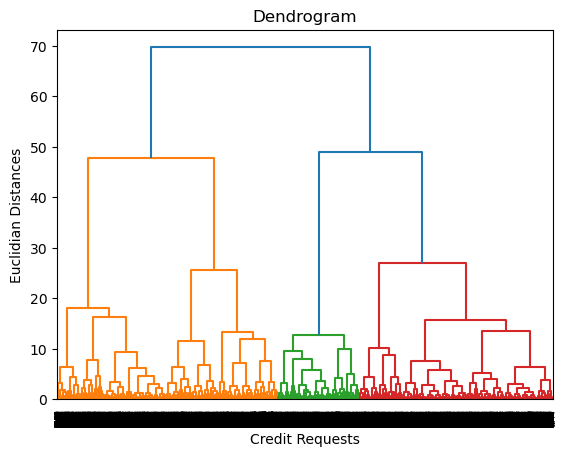

In [18]:
plt.title('Dendrogram')
plt.xlabel('Credit Requests')
plt.ylabel('Euclidian Distances')
plt.show()

#### It is observed from the dendrogram, that the best cut would be around 30 euclidian distance. So it will be ideal to have four clusters.

#### Euclidian distance measure was chosen for this dataset as it measures the direct distance between two points. City block measures or cosine method would not be applicable for this dataset.

#### The decision tree had a top to bottom approach. The branching was performed from the top. In dendrogram the branching is performed from bottom and gradually works it way to the top. Unlike decision tree, in dendrogram, similar data points are grouped together first


In [26]:
# Performing the Hierarchical Clustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(h_data_drop)

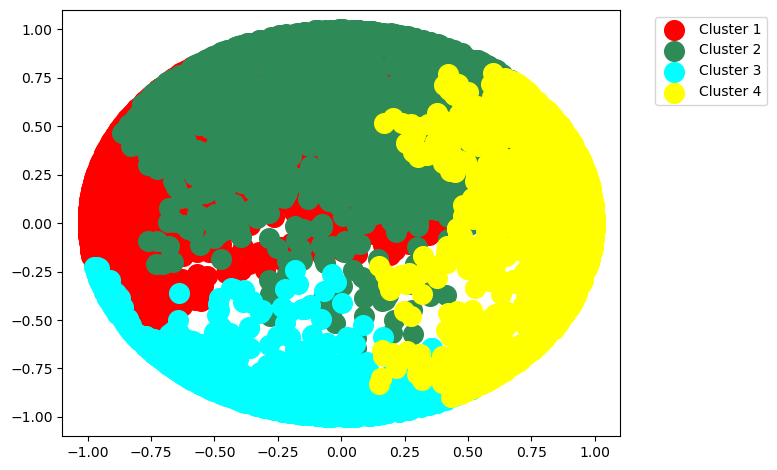

In [36]:
# Visualizing the Cluster

ar_h_data_drop = np.array(h_data_drop)
plt.scatter(ar_h_data_drop[y_hc == 0,0], ar_h_data_drop[y_hc == 0,1], s= 200, c = 'red', label = 'Cluster 1')
plt.scatter(ar_h_data_drop[y_hc == 1,0], ar_h_data_drop[y_hc == 1,1], s= 200, c = 'seagreen', label = 'Cluster 2')
plt.scatter(ar_h_data_drop[y_hc == 2,0], ar_h_data_drop[y_hc == 2,1], s= 200, c = 'cyan', label = 'Cluster 3')
plt.scatter(ar_h_data_drop[y_hc == 3,0], ar_h_data_drop[y_hc == 3,1], s= 200, c = 'yellow', label = 'Cluster 4')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Using the Principal Components to perform the K-Means clustering

In [83]:
# Converting the dataframe into array
km_data_drop = np.array(h_data_drop)

#### Using the Elbow Method to determine the K 
#### Elbow Method was chosen over Silhouette Method as Silhouette Method adds compute cost. The average distance of each point from its centroid is used to measure the distance

#### K=5 was chosen as beyond 5, there is not much changes in the inertia.

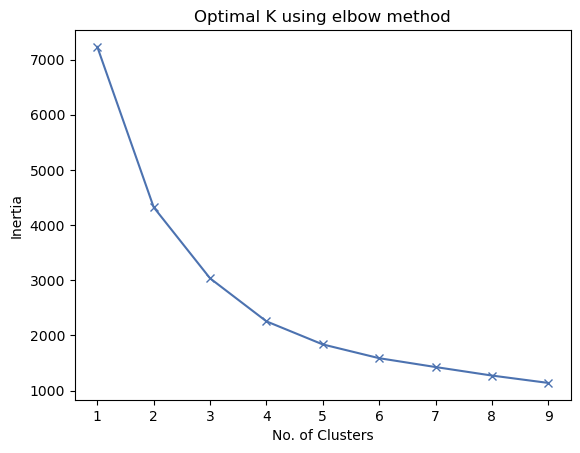

In [51]:

K = range(1,10)
ss = []
kn = []
for k in K :
    km = KMeans(n_clusters=k)
    km = km.fit(km_data_drop)
    ss.append(km.inertia_)
    kn.append(k)
    
plt.plot(kn,ss,'bx-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Optimal K using elbow method')
plt.show()


In [54]:
# Fitting the K-Means
# We have chosen 5 clusters as optimal

km = KMeans(n_clusters=5)
km = km.fit(km_data_drop)

In [82]:
km_data_drop = pd.DataFrame(km_data_drop)
km_data_drop['labels'] = km.labels_
km_data_drop.rename(columns = {0:'PC1', 1:'PC2',
                              2:'PC3'}, inplace = True)

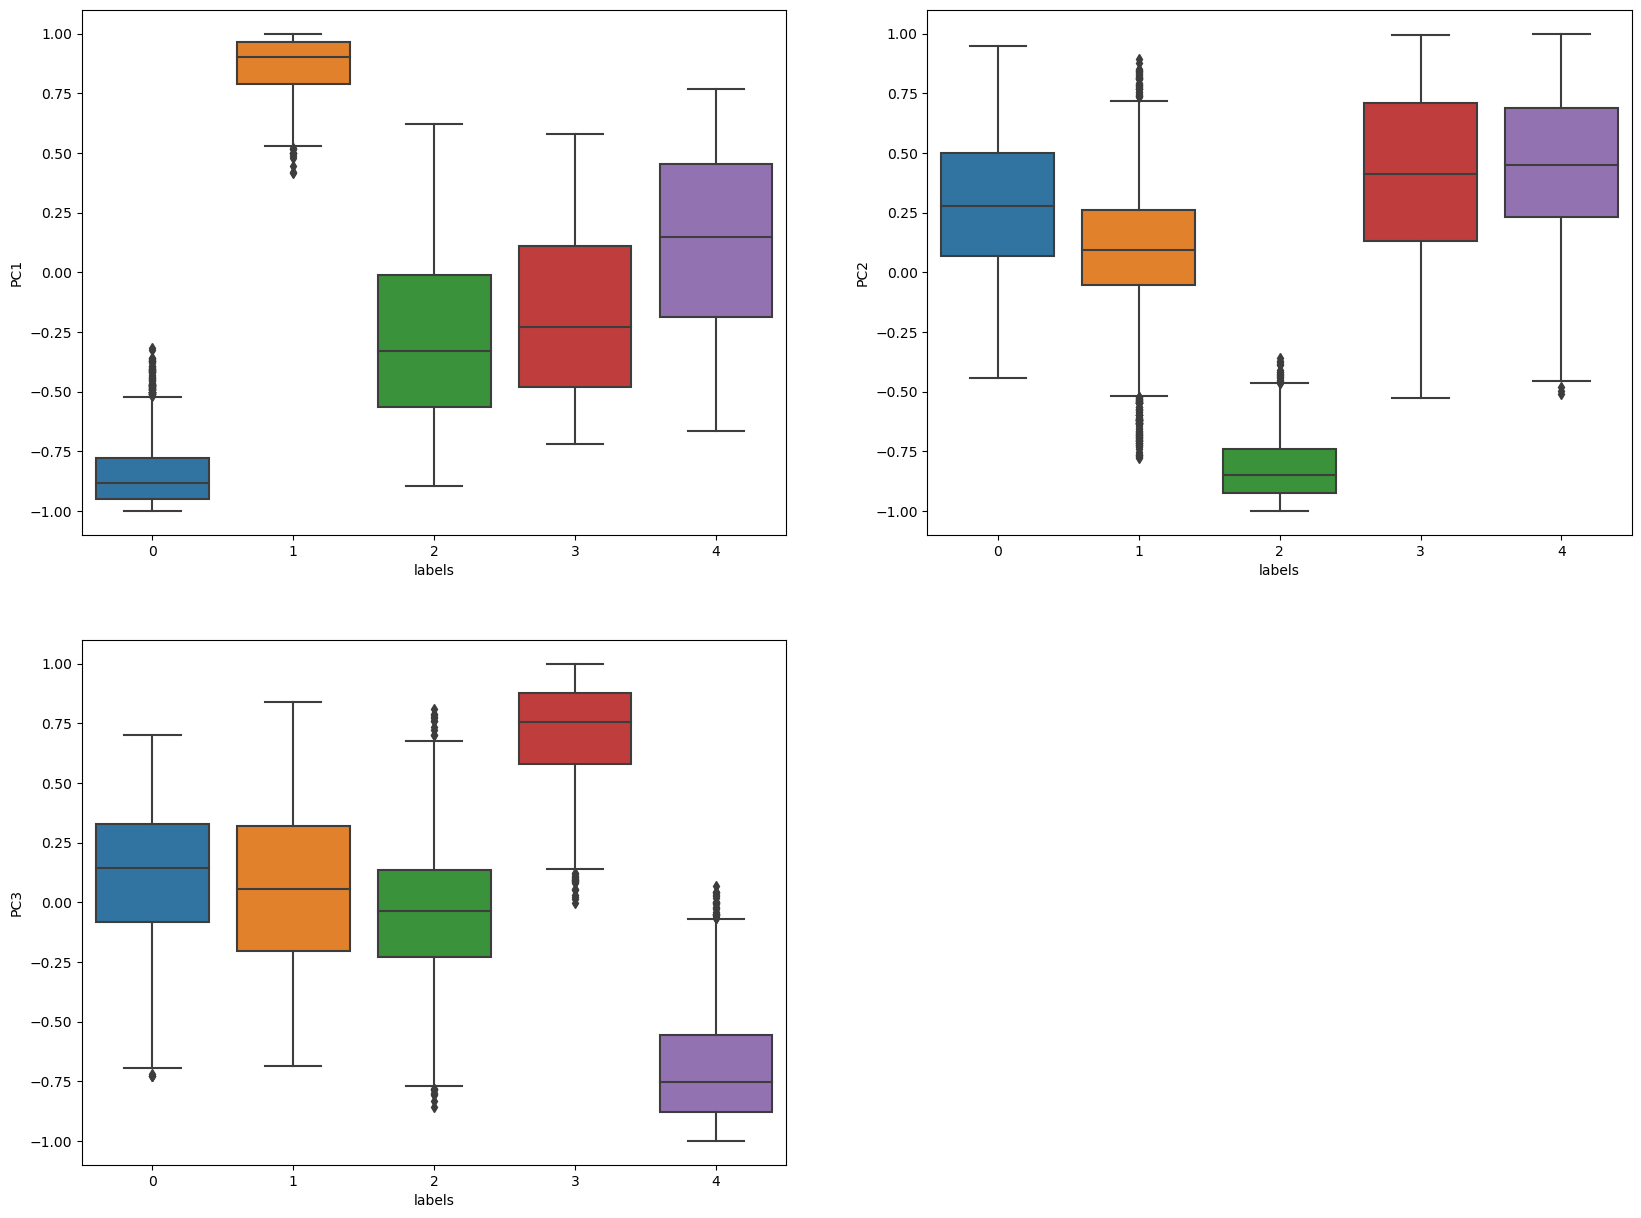

In [81]:
# Visualizing the data

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x='labels', y='PC1', data = km_data_drop)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x='labels', y='PC2', data = km_data_drop)
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.boxplot(x='labels', y='PC3', data = km_data_drop)
plt.show()



#### Principal Component 1 - It seems PC1 is more dominant in cluster 1 and least dominant in cluster 0. It has an average influence on cluster 2, 3 and 4. 
#### Principal Component 2 - It seems PC2 has an average influence on cluster 0, 1, 3 and 4. It has an low influence on cluster 2
#### Principal Component 3 - It seems PC2 has an average influence on cluster 0, 1 and 2. It has an low influence on cluster 4. It also has an high influence on cluster 3.